In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import trimesh
from omegaconf import OmegaConf

from scenefactor.data.sequence import sequence_to_point_cloud
from scenefactor.renderer.renderer import Renderer, render_multiview, renders_to_sequence
from scenefactor.utils.mesh import *
from scenefactor.utils.camera_generation import sample_view_matrices_method
from scenefactor.utils.visualize import *

In [3]:
mesh_target = read_tmesh('/home/gtangg12/scenefactor/tests/instant_mesh.obj', norm=True)
mesh_source = read_tmesh('/home/gtangg12/scenefactor/tests/instant_mesh_source.obj', norm=True)

In [4]:
W, H = 640, 480
renderer = Renderer(OmegaConf.create({'target_dim': (640, 480)}))
renderer_poses = sample_view_matrices_method('octohedron', radius=2)

renders_target = render_multiview(mesh_target, renderer, renderer_poses)
renders_source = render_multiview(mesh_source, renderer, renderer_poses)
sequence_target = renders_to_sequence(renders_target)
sequence_source = renders_to_sequence(renders_source)

Rendering views...: 100%|██████████| 6/6 [00:00<00:00, 181.88it/s]


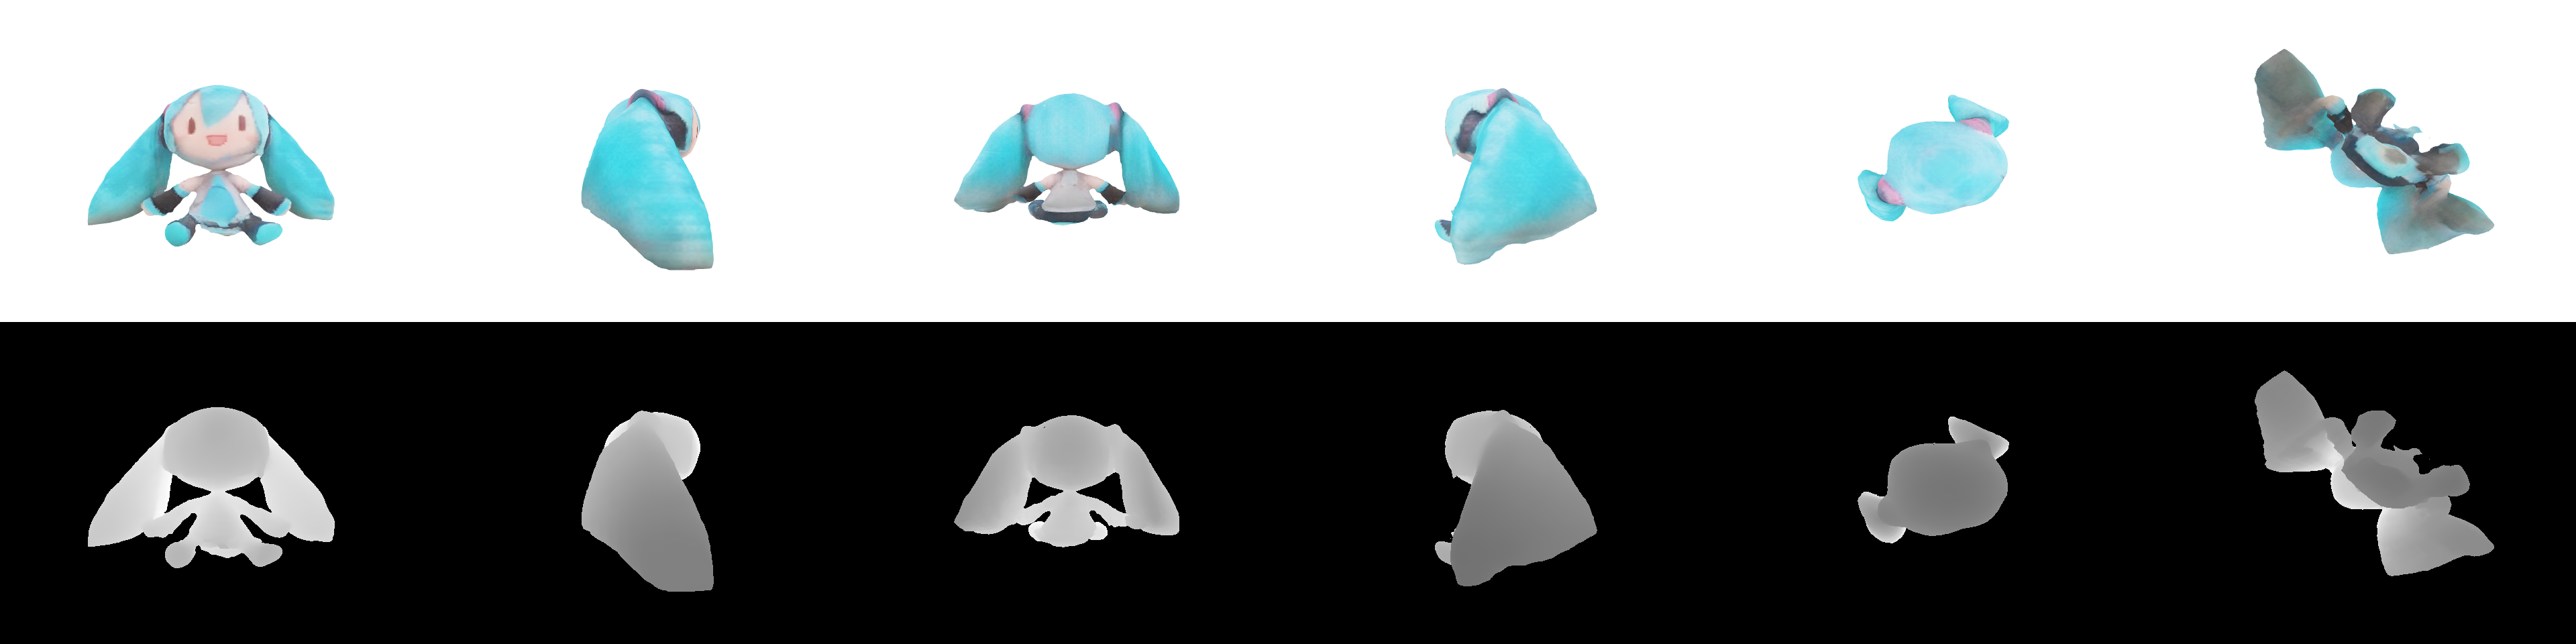

In [5]:
visualize_sequence(sequence_target)

In [6]:
pc = sequence_to_point_cloud(sequence_target[:2])
pc = np.random.permutation(pc)[:10000]
visualize_point_cloud(pc)